## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
file_loc = 'C:/Users/kelvi/OneDrive/Documents/Data Projects/Data/credit/'
file_name ='installments_payments.csv'
data_name = 'installment_payments'
dict_loc = 'C:/Users/kelvi/OneDrive/Documents/Data Projects/Data/credit/HomeCredit_columns_description.csv'

## Load Data

In [4]:
df = pd.read_csv(file_loc + file_name)

In [5]:
df.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


## Load Data Dictionary

In [7]:
data_dictionary = pd.read_csv(dict_loc, engine='python')
data_dictionary[data_dictionary['Table']==file_name]

,Unnamed: 0,Table,Row,Description,Special
211,214,installments_payments.csv,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
212,215,installments_payments.csv,SK_ID_CURR,ID of loan in our sample,hashed
213,216,installments_payments.csv,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,NaN
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN
218,221,installments_payments.csv,AMT_PAYMENT,What the client actually paid on previous cred...,NaN


## Simple charts of each feature

SK_ID_PREV  -  997752  unique. Type =  int64
description not found


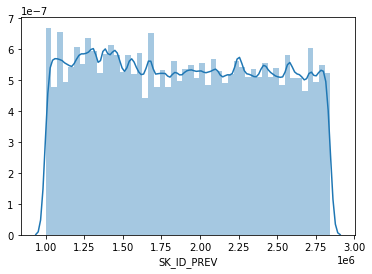

SK_ID_CURR  -  339587  unique. Type =  int64
ID of loan in our sample


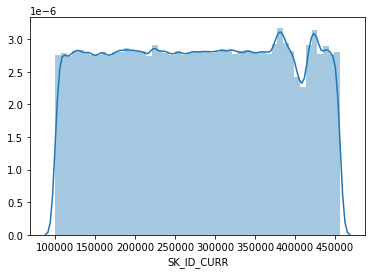

NUM_INSTALMENT_VERSION  -  65  unique. Type =  float64
Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed


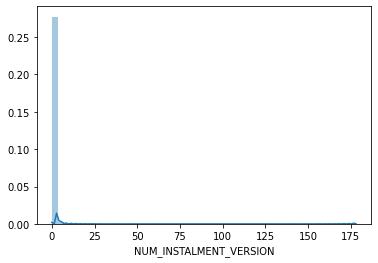

NUM_INSTALMENT_NUMBER  -  277  unique. Type =  int64
On which installment we observe payment


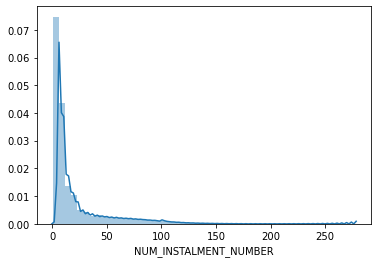

DAYS_INSTALMENT  -  2922  unique. Type =  float64
When the installment of previous credit was supposed to be paid (relative to application date of current loan)


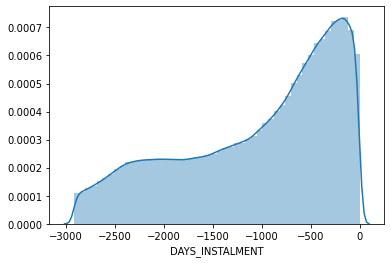

DAYS_ENTRY_PAYMENT  -  3039  unique. Type =  float64
When was the installments of previous credit paid actually (relative to application date of current loan)


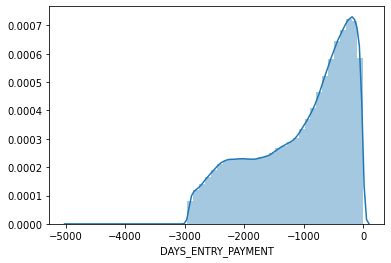

AMT_INSTALMENT  -  902539  unique. Type =  float64
What was the prescribed installment amount of previous credit on this installment


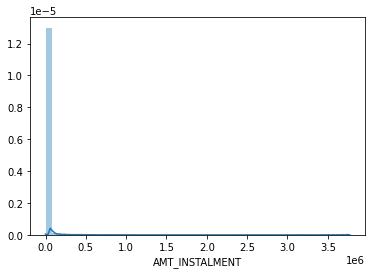

AMT_PAYMENT  -  944235  unique. Type =  float64
What the client actually paid on previous credit on this installment


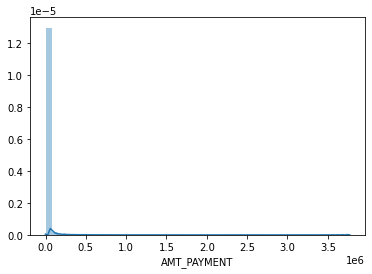

In [8]:
for column in df:
    print(column, " - ", df[column].nunique(), " unique. Type = ", df[column].dtype)
    try:
        print(data_dictionary.loc[(data_dictionary.Table==file_name) & (data_dictionary.Row==column)]['Description'].values[0])
    except:
        print("description not found")
    
    if df[column].dtype=='object':
        sns.countplot(data=df, x=column)
        plt.xticks(rotation=45)
    elif df[column].dtype=='int64':
        if df[column].nunique() < 20:
            sns.countplot(data=df, x=column)
        else:
            sns.distplot(df[column])
    elif df[column].dtype=='float64':
        sns.distplot(df[column])
    plt.show()

## Null Value Analysis

In [9]:
df_null_values = df.isnull().sum()
df_only_null_values = df_null_values.loc[(df_null_values!=0)].to_frame().reset_index()
df_only_null_values.rename(columns={'index':'row', 0:'value'}, inplace=True)
df_only_null_values.sort_values(by='value',ascending=False)

,row,value
0,DAYS_ENTRY_PAYMENT,2905
1,AMT_PAYMENT,2905


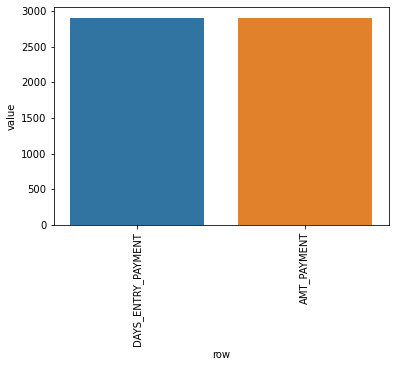

In [10]:
if df_only_null_values.size > 0:
    plot_order = df_only_null_values.sort_values(by='value', ascending=False).row.values
    sns.barplot(x='row', y='value', data=df_only_null_values, order=plot_order)
    plt.xticks(rotation=90)
    plt.show()

## Create an Output for univariate analysis

In [11]:
import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(df)

#Saving results to HTML file
sweet_report.show_html('analysis ' + data_name + '.html')


Report analysis installment_payments.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Correlation Matrix

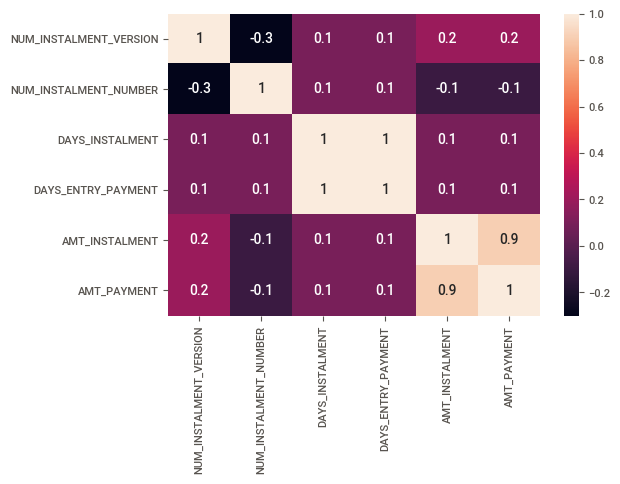

In [12]:
corrMatrix = df.drop(['SK_ID_CURR', 'SK_ID_PREV'], axis=1).corr().round(1)
sns.heatmap(corrMatrix, annot=True)
plt.show()